In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Configurando a seed para reprodutibilidade
np.random.seed(42)

# Gerando dados falsos
categorias = ['Eletrônicos', 'Roupas', 'Alimentos', 'Livros', 'Brinquedos']
datas = pd.date_range(start='2023-01-01', end='2023-12-31', freq='D')
num_registros = len(datas)

# Criando DataFrame
data = {
    'Data': np.random.choice(datas, num_registros),
    'Categoria': np.random.choice(categorias, num_registros),
    'Quantidade_Vendida': np.random.randint(1, 100, num_registros),
    'Preco_Unitario': np.round(np.random.uniform(10, 500, num_registros), 2)
}
df = pd.DataFrame(data)
df['Valor_Total'] = df['Quantidade_Vendida'] * df['Preco_Unitario']

# Salvando o DataFrame em um arquivo CSV
df.to_csv('dados_vendas.csv', index=False)

print("Conjunto de dados gerado e salvo como 'dados_vendas.csv'.")

Conjunto de dados gerado e salvo como 'dados_vendas.csv'.


Consulta e Filtragem de Dados

In [3]:
#Carregar os dados
pd.read_csv('dados_vendas.csv')

,Data,Categoria,Quantidade_Vendida,Preco_Unitario,Valor_Total
0,2023-04-13,Roupas,74,60.43,4471.82
1,2023-12-15,Alimentos,83,272.88,22649.04
2,2023-09-28,Roupas,17,195.62,3325.54
3,2023-04-17,Roupas,85,233.93,19884.05
4,2023-03-13,Roupas,78,305.94,23863.32
...,...,...,...,...,...
360,2023-10-07,Brinquedos,66,12.49,824.34
361,2023-04-24,Brinquedos,10,350.90,3509.00
362,2023-10-15,Brinquedos,5,33.90,169.50
363,2023-12-08,Brinquedos,74,270.98,20052.52


In [8]:
#Quantas linhas e colunas existem no DataFrame carregado?
print(f'Quantidade de linhas e coluna respectivamente:',df.shape)

Quantidade de linhas e coluna respectivamente: (365, 5)


In [9]:
#Quais são os tipos de dados (dtypes) das colunas?
df.dtypes

Data                  datetime64[ns]
Categoria                     object
Quantidade_Vendida             int32
Preco_Unitario               float64
Valor_Total                  float64
dtype: object

In [10]:
#Exibir as primeiras 5 linhas do DataFrame:
df.head()

,Data,Categoria,Quantidade_Vendida,Preco_Unitario,Valor_Total
0,2023-04-13,Roupas,74,60.43,4471.82
1,2023-12-15,Alimentos,83,272.88,22649.04
2,2023-09-28,Roupas,17,195.62,3325.54
3,2023-04-17,Roupas,85,233.93,19884.05
4,2023-03-13,Roupas,78,305.94,23863.32


In [19]:
#Quantas categorias únicas de produtos estão presentes no DataFrame?
df['Categoria'].unique

<bound method Series.unique of 0          Roupas
1       Alimentos
2          Roupas
3          Roupas
4          Roupas
          ...    
360    Brinquedos
361    Brinquedos
362    Brinquedos
363    Brinquedos
364        Roupas
Name: Categoria, Length: 365, dtype: object>

In [31]:
#Filtrar os dados para mostrar apenas as vendas da categoria 'Eletrônicos':
vendas_eletronicos=df[df['Categoria'] == 'Eletrônicos']
vendas_eletronicos

,Data,Categoria,Quantidade_Vendida,Preco_Unitario,Valor_Total
5,2023-07-08,Eletrônicos,73,256.12,18696.76
6,2023-01-21,Eletrônicos,1,274.53,274.53
7,2023-04-13,Eletrônicos,51,248.32,12664.32
14,2023-06-01,Eletrônicos,34,303.52,10319.68
18,2023-09-15,Eletrônicos,39,121.40,4734.60
...,...,...,...,...,...
347,2023-09-10,Eletrônicos,33,431.46,14238.18
349,2023-09-13,Eletrônicos,27,201.67,5445.09
351,2023-05-08,Eletrônicos,29,243.57,7063.53
353,2023-10-08,Eletrônicos,57,427.57,24371.49


In [49]:
#Qual é a média do valor total das vendas na categoria 'Eletrônicos'?
eletronicos=df[df['Categoria'] == 'Eletrônicos']
media_vendas = eletronicos['Valor_Total'].mean()
media_vendas

np.float64(12291.256301369864)

In [53]:
#Filtrar as vendas acima de R$ 1000
vendas_acima_1000=df[df['Valor_Total']> 1000]
vendas_acima_1000

,Data,Categoria,Quantidade_Vendida,Preco_Unitario,Valor_Total
0,2023-04-13,Roupas,74,60.43,4471.82
1,2023-12-15,Alimentos,83,272.88,22649.04
2,2023-09-28,Roupas,17,195.62,3325.54
3,2023-04-17,Roupas,85,233.93,19884.05
4,2023-03-13,Roupas,78,305.94,23863.32
...,...,...,...,...,...
358,2023-12-26,Brinquedos,68,147.88,10055.84
359,2023-06-23,Alimentos,86,133.80,11506.80
361,2023-04-24,Brinquedos,10,350.90,3509.00
363,2023-12-08,Brinquedos,74,270.98,20052.52


In [68]:
#Quantas vendas acima de R$ 1000 ocorreram?
acima_1000=len(vendas_acima_1000)
print(f"Quantidade de vendas acima de 1000:", acima_1000)

Quantidade de vendas acima de 1000: 330


Agrupamento e Agregação

In [80]:
#Agrupar os dados por categoria e calcular o total de vendas por categoria
#Agrupa os dados da coluna categoria, soma o valor de cada categoria pela coluna 'Valor_Total' e cria um novo índice
total_categoria=df.groupby('Categoria')['Valor_Total'].sum().reset_index()
total_categoria

,Categoria,Valor_Total
0,Alimentos,742457.74
1,Brinquedos,1187964.04
2,Eletrônicos,897261.71
3,Livros,963685.46
4,Roupas,991215.29


In [101]:
#Qual categoria teve o maior valor total de vendas?
#Encontra o índice onde o valor é o maior baseado na coluna "Valor_Total", e retorna a categoria onde o índice foi o maior
mais_vendida = total_categoria.loc[total_categoria['Valor_Total'].idxmax(), 'Categoria']
valor_maximo = total_categoria['Valor_Total'].max()
print(f'A categoria mais vendida foi:',mais_vendida,"-- Com um valor total de:",valor_maximo)


A categoria mais vendida foi: Brinquedos -- Com um valor total de: 1187964.04


In [107]:
#Calcular a quantidade média vendida por categoria
#Filtra a categoria e, calcula médida da quantidade vendida e cria um novo índice
media_quantidade_vendida=df.groupby('Categoria')['Quantidade_Vendida'].mean().reset_index()
media_quantidade_vendida

,Categoria,Quantidade_Vendida
0,Alimentos,55.618182
1,Brinquedos,47.247191
2,Eletrônicos,46.780822
3,Livros,50.917808
4,Roupas,47.200000


In [111]:
#Qual categoria teve a maior quantidade média vendida?
#Localiza no df media_quantidade_vendida o id com maior valor na coluna 'Quantidade_Vendida' e retorna a categoria que está na linha.
maior_quantidade = media_quantidade_vendida.loc[media_quantidade_vendida['Quantidade_Vendida'].idxmax(), 'Categoria']
media_maxima = media_quantidade_vendida['Quantidade_Vendida'].max()
print(f'A categoria com maior quantidade vendida foi:',maior_quantidade,"-- Com um total de:",media_maxima)

A categoria com maior quantidade vendida foi: Alimentos -- Com um total de: 55.61818181818182


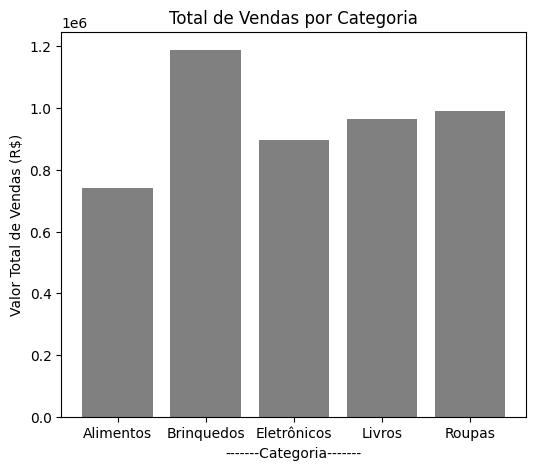

In [147]:
#Criar um gráfico de barras mostrando o total de vendas por categoria
plt.figure(figsize=(6, 5))
plt.bar(total_categoria['Categoria'], total_categoria['Valor_Total'], color='gray')
plt.xlabel('-------Categoria-------')
plt.ylabel('Valor Total de Vendas (R$)')
plt.title('Total de Vendas por Categoria')
plt.show()

Com base no gráfico, qual categoria visualmente se destaca em termos de vendas totais?

-BRINQUEDOS

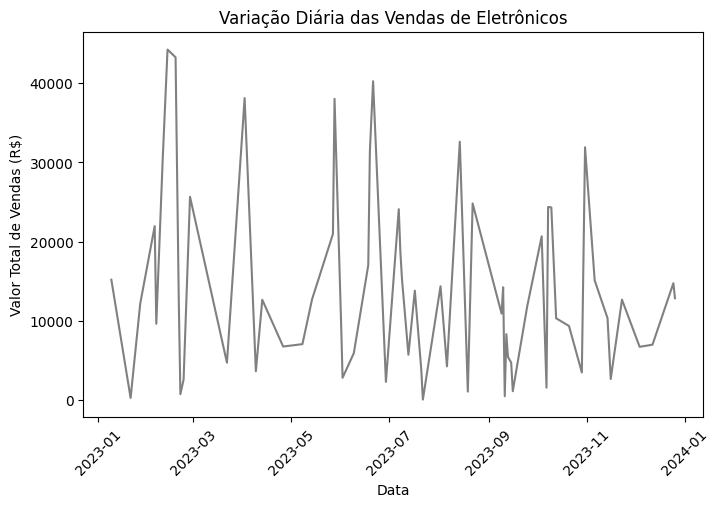

In [153]:
#Criar um gráfico de linha mostrando a variação diária das vendas de 'Eletrônicos':

vendas_diarias = eletronicos.groupby('Data')['Valor_Total'].sum().reset_index()

plt.figure(figsize=(8, 5))
plt.plot(vendas_diarias['Data'], vendas_diarias['Valor_Total'], color='gray')
plt.xlabel('Data')
plt.ylabel('Valor Total de Vendas (R$)')
plt.title('Variação Diária das Vendas de Eletrônicos')
plt.xticks(rotation=45)
plt.show()

Existe algum padrão ou tendência observável nas vendas diárias de eletrônicos?

Com base na observação de que as vendas são melhores nos primeiros 7 dias do mês e que, após esse período, há uma oscilação.